In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

/Users/amlannag/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [21]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
X = lfw_people.images
Y = lfw_people.target
# Verify the value range of X_train. No normalization is necessary in this case,
# as the input values already fall within the range of 0.0 to 1.0.
print("X_min:",X.min(),"X_train_max:", X.max())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train = X_train[:, :, :,np.newaxis]
X_test = X_test[:, :, :,np.newaxis]
print("X_train shape:", X_train.shape)

X_min: 0.0 X_train_max: 1.0
X_train shape: (901, 50, 37, 1)


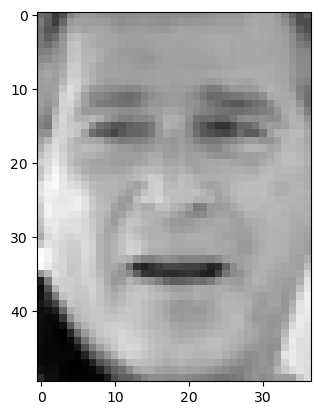

In [4]:
plt.imshow(X_train[0,:,:,0], cmap='gray')
plt.show()

In [5]:
targets = lfw_people.target
target_names = lfw_people.target_names

# Count the number of occurrences for each target (person)
category_counts = np.bincount(targets)

# Display the number of occurrences for each category
for name, count in zip(target_names, category_counts):
    print(f"{name}: {count}")

Ariel Sharon: 77
Colin Powell: 236
Donald Rumsfeld: 121
George W Bush: 530
Gerhard Schroeder: 109
Hugo Chavez: 71
Tony Blair: 144


In [6]:
n_samples, h, w = lfw_people.images.shape
n_classes = len(np.unique(y_train))
print("Number of unique categories in y_train:", n_classes)
print("H",h)
print("W",w)

Number of unique categories in y_train: 7
H 50
W 37


In [7]:
depth = 32 #how much encoding to apply
batch_size = 256
epochs = 1
categories = n_classes


In [8]:
inputs = Input(shape=(h,w,1))
net1 = Conv2D(filters = 32, kernel_size = (3,3), padding="same", activation="relu")(inputs)
pool1 = MaxPooling2D(pool_size=(2,2))(net1)
net2 = Conv2D(filters = 32, kernel_size = (3,3), padding="same", activation="relu")(pool1)
pool2 = MaxPooling2D(pool_size=(2,2))(net2)
flat = Flatten()(pool2)
net3 = Dense(128, activation="relu")(flat)
output = Dense(categories, activation="softmax")(net3)

In [26]:
model = Model(inputs, output)

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
y_train_cat = to_categorical(y_train, categories)
y_test_cat = to_categorical(y_test, categories)

In [28]:
model.fit(X_train, y_train_cat,
                epochs=10,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, y_test_cat))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.4841 - loss: 1.4783 - val_accuracy: 0.4393 - val_loss: 1.5228
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.4843 - loss: 1.4341 - val_accuracy: 0.4625 - val_loss: 1.4931
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.4918 - loss: 1.3984 - val_accuracy: 0.4574 - val_loss: 1.4719
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.4908 - loss: 1.3687 - val_accuracy: 0.4729 - val_loss: 1.4360
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.5285 - loss: 1.3155 - val_accuracy: 0.4884 - val_loss: 1.4062
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.5421 - loss: 1.2870 - val_accuracy: 0.5065 - val_loss: 1.3816
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.5516 - loss: 1.2401 - val_accuracy: 0.5297 - val_loss: 1.3509
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - accuracy: 0.5751 - loss: 1.1926 - val_accuracy: 0.5426 - val_loss:

In [29]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
print(predictions)

#print performance to compare with previous RF versions
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[3 3 1 3 3 1 3 6 3 3 3 3 6 3 2 3 3 3 3 2 3 3 6 1 3 3 3 3 3 3 1 3 2 3 3 1 3
 3 1 1 1 3 1 1 1 3 1 3 1 6 1 1 3 3 3 3 3 3 3 3 3 3 3 1 6 1 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 6 3 2 3 3 3 3 3 1 1 3 3 6 3 1 3 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 1 2 6 3 3 3 3 3 1 1 3 1 3 6 1 4 1 3 3 6
 3 3 3 3 1 3 3 3 1 1 3 1 3 3 3 1 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 1 6 1 3 1 3
 3 3 6 1 6 3 3 6 3 1 2 3 3 3 3 3 3 2 3 1 3 3 1 3 1 3 3 1 2 3 3 6 3 3 1 3 3
 3 6 3 3 3 2 3 6 3 3 3 1 3 1 1 3 2 1 2 3 1 2 3 3 1 3 3 1 1 1 3 3 1 3 3 3 1
 1 2 3 1 1 1 3 3 1 1 3 3 6 3 3 3 3 3 1 1 3 2 3 3 3 3 3 3 1 3 1 3 6 3 3 1 6
 3 1 3 3 3 2 1 3 3 1 1 3 2 3 1 3 2 3 1 6 3 3 3 6 1 1 1 1 3 1 3 2 3 6 3 1 3
 3 3 3 3 3 3 1 3 3 3 2 3 3 3 3 3 1 3 3 3 3 6 1 1 3 3 3 3 3 2 3 2 1 3 3 3 3
 1 3 3 3 3 3 3 3 2 3 1 2 3 1 3 3 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.62      0.74      0.67        74
           2

/Users/amlannag/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amlannag/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amlannag/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
model2 = Model(inputs, output)


model2.compile(
    optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.0005,
    momentum=0.9,
    nesterov=False,
    name="SGD"), 
    loss='categorical_crossentropy', 
               metrics=['accuracy'])

model2.fit(X_train, y_train_cat,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, y_test_cat))



Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.5946 - loss: 1.1017 - val_accuracy: 0.5659 - val_loss: 1.2481
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.5913 - loss: 1.1083 - val_accuracy: 0.5736 - val_loss: 1.2470
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - accuracy: 0.5982 - loss: 1.0892 - val_accuracy: 0.5762 - val_loss: 1.2475
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.6002 - loss: 1.0910 - val_accuracy: 0.5633 - val_loss: 1.2467
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.5937 - loss: 1.0949 - val_accuracy: 0.5659 - val_loss: 1.2469


In [31]:
predictions = model2.predict(X_test)
predictions = np.argmax(predictions, axis=1)
print(predictions)

#print performance to compare with previous RF versions
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[3 3 1 3 3 1 3 3 3 3 3 3 6 3 2 3 3 3 3 2 3 3 6 1 3 3 3 3 3 3 1 3 2 3 3 1 3
 3 1 1 1 3 1 1 1 3 1 3 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 6 1 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 6 3 2 3 3 3 3 3 1 1 3 3 6 3 1 3 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 1 2 6 3 3 3 3 3 1 1 3 1 3 3 1 3 1 3 3 1
 3 3 3 3 1 3 3 3 1 1 3 1 3 3 3 1 3 3 3 1 3 3 3 3 1 3 3 3 1 3 1 1 6 1 3 1 3
 3 3 6 1 6 3 3 3 3 1 2 3 3 3 3 3 3 2 3 1 3 3 1 3 1 3 3 1 2 3 3 2 3 3 1 3 3
 3 6 3 3 3 2 3 6 3 3 3 1 3 1 1 3 2 1 2 3 1 1 3 3 1 3 3 1 1 1 3 3 1 3 3 3 1
 1 2 3 1 1 1 3 3 1 1 3 3 6 3 3 3 3 3 1 1 3 2 3 3 3 3 3 3 1 3 1 3 6 3 3 1 6
 3 1 3 3 3 2 1 3 3 1 1 3 2 3 1 3 3 3 1 6 3 3 3 1 1 1 3 1 3 1 3 2 3 6 3 1 3
 3 3 1 3 3 3 1 3 3 3 2 3 3 3 3 3 1 3 3 3 1 6 1 1 3 3 3 3 3 2 3 2 1 3 3 3 3
 1 3 3 3 3 3 3 3 1 3 1 2 3 1 3 3 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.59      0.76      0.66        74
           2

/Users/amlannag/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amlannag/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amlannag/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
